FileNotFoundError: [Errno 2] No such file or directory: '../Images\\4418.png'

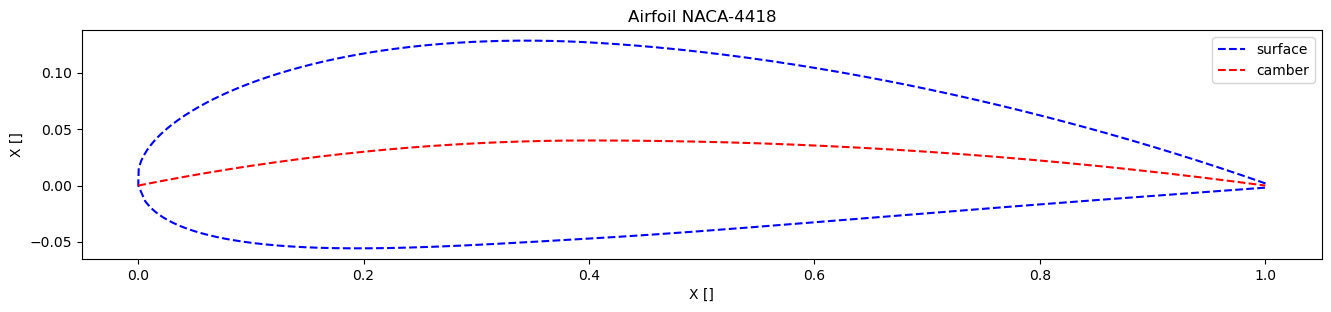

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

class NACA():
    def __init__(self, x, y, c, C, n_coords, series):
        self.x = x
        self.y = y
        self.c = c
        self.C = C
        self.n_coords = n_coords
        self.series = series
        
    def plot(self):  
        plt.figure(figsize=(16,9))
        plt.plot(self.x, self.y, 'b--', label='surface')
        plt.plot(self.c, self.C, 'r--', label='camber')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.gca().legend()
        plt.xlabel('X []')
        plt.ylabel('X []')
        plt.title('Airfoil NACA-{}'.format(self.series))
        plt.savefig(os.path.join('../Images', self.series+'.png'))
        plt.show()
        
def naca_4_digits_coordinates(naca, n_coords=300):
    '''
    This function generates the the coordinates of 
    the upper and lower surface of the airfoil and the
    coordinates of the camberline as well. All coordinates
    are adimentional.
    
    Inputs:
        - naca: string. 4 digits naca code (ex: 4418)
        - n: integer. Number of points to discretize airfoil surface
        - plot: boolean. If False, no airfoil plot
    Outputs:
        - X: float. Horizontal coordinates of the airfoil surface
        - Y: float. Vertical coordinates of the airfoil surface
        - c: float. Horizontal coordinates of the camber line
        - C: float. Vertical coordinates of the camber line
    '''
    if len(naca)!=4:
        raise Exception('Naca is not a 4 digit series!')
    
    # Get characteristic dimensions as percentage of the chord
    m = int(naca[0])/100
    p = int(naca[1])/10 + np.finfo(float).eps
    ss = int(naca[2:])/100
    n_coord= 300;

    # Define unit cord
    c = np.linspace(0, 1, n_coord)

    # Calculate airfoil thickness
    Y = 5*ss*(0.29690*np.sqrt(c)-0.12600*c-0.35160*np.power(c, 2)+0.28430*np.power(c, 3)-0.10150*np.power(c, 4))

    # Calculate camber line and gradient
    f = c[c<=p] # front
    b = c[c>p] # back
    c_f = m/(np.power(p, 2))*(2*p*f-np.power(f, 2))
    c_b = m/np.power(1-p, 2)*(1-2*p+2*p*b-np.power(b, 2))

    C = np.concatenate((c_f, c_b), axis=0)
    dc_f = 2*m/(np.power(p,2))*(p-f)
    dc_b = 2*m/(np.power(1-p,2))*(p-b)
    dC = np.concatenate((dc_f, dc_b), axis=0)

    # Calcualate upper and lower surface coordinates of the airfoil
    theta = np.arctan(dC)
    x_u = c - Y*np.sin(theta)
    y_u = C + Y*np.cos(theta)
    x_l = c + Y*np.sin(theta)
    y_l = C - Y*np.cos(theta)

    x = np.concatenate((np.flip(x_u), x_l), axis=0)
    y = np.concatenate((np.flip(y_u), y_l), axis=0)
    
    return NACA(x, y, c, C, n_coords, naca)

naca4418 = naca_4_digits_coordinates('4418', n_coords=300)
naca4418.plot()